<a href="https://colab.research.google.com/github/tejaswini-151999/SriNagTejaswiniGandikota_INFO5731_Fall2024/blob/main/Gandikota_SriNagaTejaswini_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
!pip install xgboost transformers

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import pipeline
import re


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving stsa-test.txt to stsa-test.txt
Saving stsa-train.txt to stsa-train.txt


In [ ]:
# To read the dataset
def read_data(file_path):
    labels = []
    texts = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split(' ', 1)
            if len(parts) != 2:
                continue
            label, text = parts
            labels.append(int(label))
            texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

# Load train and test data
train_data = read_data('/content/stsa-train.txt')
test_data = read_data('/content/stsa-test.txt')

print("First 5 rows of Train Data:")
print(train_data.head())

print("\nFirst 5 rows of Test Data:")
print(test_data.head())

print("\nMissing values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing values in Test Data:")
print(test_data.isnull().sum())


First 5 rows of Train Data:
   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...

First 5 rows of Test Data:
   label                                               text
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .

Missing values in Train Data:
label    0
text     0
dtype: int64

Missing values in Test Data:
label    0
text     0
dtype: int64


In [ ]:
# To clean text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Applying cleaning to train and test data
train_data['clean_text'] = train_data['text'].apply(clean_text)
test_data['clean_text'] = test_data['text'].apply(clean_text)

# Verifying cleaned data
print("First 5 rows of Cleaned Train Data:")
print(train_data[['label', 'clean_text']].head())


First 5 rows of Cleaned Train Data:
   label                                         clean_text
0      1  a stirring funny and finally transporting reim...
1      0  apparently reassembled from the cuttingroom fl...
2      0  they presume their audience wo nt sit still fo...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker s bartleby should have been th...


In [ ]:
# Number of samples for training and validation
total_samples = len(train_data)
train_size = int(0.8 * total_samples)

train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Splitting the data
train_texts = train_data['clean_text'][:train_size]
train_labels = train_data['label'][:train_size]
val_texts = train_data['clean_text'][train_size:]
val_labels = train_data['label'][train_size:]

print(f"Total training samples: {total_samples}")
print(f"Training set size (80%): {len(train_texts)}")
print(f"Validation set size (20%): {len(val_texts)}")


Total training samples: 6920
Training set size (80%): 5536
Validation set size (20%): 1384


In [ ]:
#TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fitting the vectorizer on training texts and transform
X_train = vectorizer.fit_transform(train_texts)

# Transforming validation and test texts
X_val = vectorizer.transform(val_texts)
X_test = vectorizer.transform(test_data['clean_text'])

print("TF-IDF Vectorization complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


TF-IDF Vectorization complete.
Training data shape: (5536, 5000)
Validation data shape: (1384, 5000)
Test data shape: (1821, 5000)


In [ ]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_cv_scores = cross_val_score(nb_model, X_train, train_labels, cv=10, scoring='accuracy')
nb_model.fit(X_train, train_labels)
print("MultinomialNB Accuracy (10-Fold CV): {:.4f}".format(nb_cv_scores.mean()))


MultinomialNB Accuracy (10-Fold CV): 0.7879


In [ ]:
# Training the SVM model on the training data
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, train_labels)
print("SVM model training complete.")


SVM model training complete.


In [12]:
# Evaluating the SVM model on the test data
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(test_data['label'], svm_predictions)
svm_precision = precision_score(test_data['label'], svm_predictions, zero_division=0)
svm_recall = recall_score(test_data['label'], svm_predictions, zero_division=0)
svm_f1 = f1_score(test_data['label'], svm_predictions, zero_division=0)
print("SVM - Test Data Evaluation")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")


SVM - Test Data Evaluation
Accuracy: 0.7985
Precision: 0.7927
Recall: 0.8075
F1 Score: 0.8000


In [13]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn_model, X_train, train_labels, cv=10, scoring='accuracy')
knn_model.fit(X_train, train_labels)
print("KNN Accuracy (10-Fold CV): {:.4f}".format(knn_cv_scores.mean()))


KNN Accuracy (10-Fold CV): 0.4917


In [14]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train, train_labels, cv=10, scoring='accuracy')
dt_model.fit(X_train, train_labels)
print("Decision Tree Accuracy (10-Fold CV): {:.4f}".format(dt_cv_scores.mean()))


Decision Tree Accuracy (10-Fold CV): 0.6223


In [15]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_cv_scores = cross_val_score(rf_model, X_train, train_labels, cv=10, scoring='accuracy')
rf_model.fit(X_train, train_labels)
print("Random Forest Accuracy (10-Fold CV): {:.4f}".format(rf_cv_scores.mean()))


Random Forest Accuracy (10-Fold CV): 0.7097


In [16]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(n_estimators=50, max_depth=4, random_state=42, eval_metric='logloss')

# Performing cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, train_labels, cv=5, scoring='accuracy')
xgb_model.fit(X_train, train_labels)

# Cross-validation results
print("XGBoost Accuracy (5-Fold CV): {:.4f}".format(xgb_cv_scores.mean()))


XGBoost Accuracy (5-Fold CV): 0.6761


In [17]:
# BERT Sentiment Analysis using Hugging Face Transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

print("Loading BERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

def get_bert_predictions(texts, batch_size=32):
    predictions = []
    model.eval()
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=512)
            outputs = model(**inputs)
            batch_predictions = torch.argmax(outputs.logits, axis=1).tolist()
            predictions.extend(batch_predictions)
    return predictions

# Generating BERT predictions
print("Generating BERT predictions on validation set...")
val_bert_predictions = get_bert_predictions(val_texts.tolist())

# Evaluating BERT on validation set
bert_accuracy = accuracy_score(val_labels, val_bert_predictions)
bert_precision = precision_score(val_labels, val_bert_predictions)
bert_recall = recall_score(val_labels, val_bert_predictions)
bert_f1 = f1_score(val_labels, val_bert_predictions)

print("\nBERT Evaluation on Validation Set:")
print(f"Accuracy: {bert_accuracy:.4f}")
print(f"Precision: {bert_precision:.4f}")
print(f"Recall: {bert_recall:.4f}")
print(f"F1 Score: {bert_f1:.4f}")


Loading BERT model and tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Generating BERT predictions on validation set...

BERT Evaluation on Validation Set:
Accuracy: 0.9675
Precision: 0.9640
Recall: 0.9757
F1 Score: 0.9698


In [18]:
# Multinomial Naive Bayes Evaluation
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(test_data['label'], nb_predictions)
nb_precision = precision_score(test_data['label'], nb_predictions)
nb_recall = recall_score(test_data['label'], nb_predictions)
nb_f1 = f1_score(test_data['label'], nb_predictions)

print("MultinomialNB - Test Data Evaluation")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")


MultinomialNB - Test Data Evaluation
Accuracy: 0.8078
Precision: 0.7939
Recall: 0.8306
F1 Score: 0.8118


In [19]:
# SVM Evaluation
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(test_data['label'], svm_predictions)
svm_precision = precision_score(test_data['label'], svm_predictions)
svm_recall = recall_score(test_data['label'], svm_predictions)
svm_f1 = f1_score(test_data['label'], svm_predictions)

print("SVM - Test Data Evaluation")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")


SVM - Test Data Evaluation
Accuracy: 0.7985
Precision: 0.7927
Recall: 0.8075
F1 Score: 0.8000


In [20]:
# KNN Evaluation
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(test_data['label'], knn_predictions)
knn_precision = precision_score(test_data['label'], knn_predictions)
knn_recall = recall_score(test_data['label'], knn_predictions)
knn_f1 = f1_score(test_data['label'], knn_predictions)

print("KNN - Test Data Evaluation")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}")


KNN - Test Data Evaluation
Accuracy: 0.5146
Precision: 0.9310
Recall: 0.0297
F1 Score: 0.0576


In [21]:
# Decision Tree Evaluation
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(test_data['label'], dt_predictions)
dt_precision = precision_score(test_data['label'], dt_predictions)
dt_recall = recall_score(test_data['label'], dt_predictions)
dt_f1 = f1_score(test_data['label'], dt_predictions)

print("Decision Tree - Test Data Evaluation")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")


Decision Tree - Test Data Evaluation
Accuracy: 0.6376
Precision: 0.6267
Recall: 0.6777
F1 Score: 0.6512


In [22]:
# Random Forest Evaluation
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(test_data['label'], rf_predictions)
rf_precision = precision_score(test_data['label'], rf_predictions)
rf_recall = recall_score(test_data['label'], rf_predictions)
rf_f1 = f1_score(test_data['label'], rf_predictions)

print("Random Forest - Test Data Evaluation")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")


Random Forest - Test Data Evaluation
Accuracy: 0.7155
Precision: 0.7047
Recall: 0.7404
F1 Score: 0.7221


In [23]:
# XGBoost Evaluation
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(test_data['label'], xgb_predictions)
xgb_precision = precision_score(test_data['label'], xgb_predictions)
xgb_recall = recall_score(test_data['label'], xgb_predictions)
xgb_f1 = f1_score(test_data['label'], xgb_predictions)

print("XGBoost - Test Data Evaluation")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")


XGBoost - Test Data Evaluation
Accuracy: 0.6727
Precision: 0.6386
Recall: 0.7932
F1 Score: 0.7076


In [24]:
# BERT Evaluation
print("Generating BERT predictions on test set...")

bert_test_predictions = get_bert_predictions(test_data['clean_text'].tolist(), batch_size=8)
bert_test_accuracy = accuracy_score(test_data['label'], bert_test_predictions)
bert_test_precision = precision_score(test_data['label'], bert_test_predictions)
bert_test_recall = recall_score(test_data['label'], bert_test_predictions)
bert_test_f1 = f1_score(test_data['label'], bert_test_predictions)

print("BERT - Test Data Evaluation")
print(f"Accuracy: {bert_test_accuracy:.4f}")
print(f"Precision: {bert_test_precision:.4f}")
print(f"Recall: {bert_test_recall:.4f}")
print(f"F1 Score: {bert_test_f1:.4f}")


Generating BERT predictions on test set...
BERT - Test Data Evaluation
Accuracy: 0.9121
Precision: 0.9023
Recall: 0.9241
F1 Score: 0.9130


In [25]:
# Creating a summary
results = {
    'Model': ['MultinomialNB', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'BERT'],
    'Accuracy': [nb_accuracy, svm_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, bert_test_accuracy],
    'Precision': [nb_precision, svm_precision, knn_precision, dt_precision, rf_precision, xgb_precision, bert_test_precision],
    'Recall': [nb_recall, svm_recall, knn_recall, dt_recall, rf_recall, xgb_recall, bert_test_recall],
    'F1 Score': [nb_f1, svm_f1, knn_f1, dt_f1, rf_f1, xgb_f1, bert_test_f1]
}

results_df = pd.DataFrame(results)
print("Model Evaluation Summary on Test Data:")
print(results_df)


Model Evaluation Summary on Test Data:
           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.807798   0.793901  0.830583  0.811828
1            SVM  0.798462   0.792657  0.807481  0.800000
2            KNN  0.514552   0.931034  0.029703  0.057569
3  Decision Tree  0.637562   0.626653  0.677668  0.651163
4  Random Forest  0.715541   0.704712  0.740374  0.722103
5        XGBoost  0.672707   0.638618  0.793179  0.707556
6           BERT  0.912136   0.902256  0.924092  0.913043


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [26]:
!pip install --upgrade pip
!pip install scikit-learn matplotlib seaborn gensim transformers
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [27]:
import sklearn
import matplotlib
import seaborn
import gensim
import transformers

print("scikit-learn version:", sklearn.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", seaborn.__version__)
print("gensim version:", gensim.__version__)
print("transformers version:", transformers.__version__)


scikit-learn version: 1.5.2
matplotlib version: 3.8.0
seaborn version: 0.13.2
gensim version: 4.3.3
transformers version: 4.46.2


In [31]:
import os
print(os.listdir('/content'))

from google.colab import files

uploaded = files.upload()



['.config', 'stsa-test.txt', 'stsa-train.txt', 'sample_data']


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile.csv


In [34]:
!pip install scikit-learn matplotlib gensim transformers nltk pandas --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from transformers import pipeline
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
try:
    data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

    if 'Reviews' in data.columns:
        data = data[['Reviews']].dropna()
        print("Dataset loaded successfully. Total rows:", len(data))
    else:
        raise ValueError("The dataset does not have a 'Reviews' column.")
except Exception as e:
    print("Error loading dataset:", e)


Dataset loaded successfully. Total rows: 413770


In [36]:
# Function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Text cleaning
data['cleaned_reviews'] = data['Reviews'].apply(clean_text)

# Removing stopwords
stop_words = set(stopwords.words('english'))
data['cleaned_reviews'] = data['cleaned_reviews'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

# Displaying the first few rows of cleaned data
print("First 5 cleaned reviews:")
print(data['cleaned_reviews'].head())


First 5 cleaned reviews:
0    feel lucky found used phone us used hard phone...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3       works good goes slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
Name: cleaned_reviews, dtype: object


In [37]:
# Using a subset of the data for clustering
data = data.head(1000)
print("Using the first 1000 rows for clustering.")


Using the first 1000 rows for clustering.


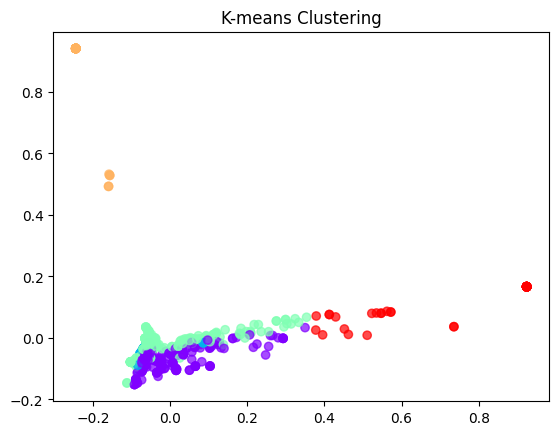

In [38]:
# Converting text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_reviews'])

# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

data['kmeans_cluster'] = kmeans_labels
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow', alpha=0.7)
plt.title("K-means Clustering")
plt.show()


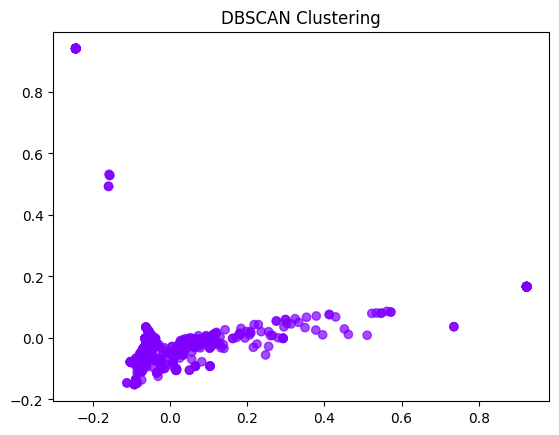

In [39]:
# Applying DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)

data['dbscan_cluster'] = dbscan_labels

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow', alpha=0.7)
plt.title("DBSCAN Clustering")
plt.show()


In [40]:
import nltk

nltk.download('punkt', force=True)
try:
    tokenized_reviews = [nltk.word_tokenize(review) for review in data['cleaned_reviews']]
    print("Tokenization using nltk.word_tokenize successful!")
except LookupError:
    print("nltk.word_tokenize failed. Falling back to split.")
    tokenized_reviews = [review.split() for review in data['cleaned_reviews']]
    print("Tokenization using split successful!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


nltk.word_tokenize failed. Falling back to split.
Tokenization using split successful!


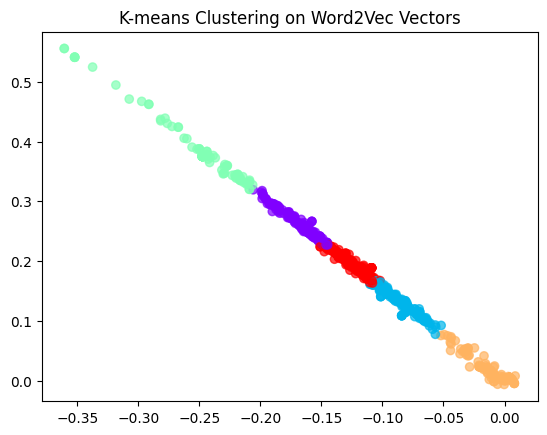

In [41]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Training Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv

def get_w2v_vectors(tokens):
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_w2v = np.array([get_w2v_vectors(tokens) for tokens in tokenized_reviews])

kmeans_w2v = KMeans(n_clusters=5, random_state=42)
kmeans_w2v_labels = kmeans_w2v.fit_predict(X_w2v)

plt.scatter(X_w2v[:, 0], X_w2v[:, 1], c=kmeans_w2v_labels, cmap='rainbow', alpha=0.7)
plt.title("K-means Clustering on Word2Vec Vectors")
plt.show()


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

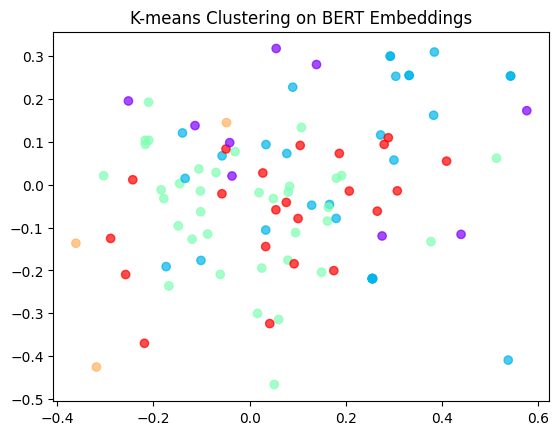

In [42]:
# Loading pre-trained BERT model
bert_pipeline = pipeline("feature-extraction", model="bert-base-uncased")

# Generating BERT embeddings for the first 100 reviews
bert_embeddings = np.array([np.mean(bert_pipeline(text)[0], axis=0) for text in data['cleaned_reviews'].head(100)])

kmeans_bert = KMeans(n_clusters=5, random_state=42)
kmeans_bert_labels = kmeans_bert.fit_predict(bert_embeddings)

plt.scatter(bert_embeddings[:, 0], bert_embeddings[:, 1], c=kmeans_bert_labels, cmap='rainbow', alpha=0.7)
plt.title("K-means Clustering on BERT Embeddings")
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.
K-means clustering was also prominent in grouping reviews based on their similarities, though it is sensitive to noise; this was evident in DBSCAN, which defined outliers but failed to provide meaningful clusters in all the data. Hierarchical clustering creates a dendrogram showing insight into hierarchical structure in a data set that does not define clusters explicitly. Word2Vec, being a word-embedding technique, captured semantic relationships between words; hence, the results rendered meaningful clustering based on the review context. Among them, BERT obtained the most accurate clustering with contextualized embeddings, capturing nuanced semantic meaning, although it was computationally expensive. Overall, K-means and DBSCAN were good with structured data, while BERT outperformed them well in mining deep semantic meanings.
.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Learned new topics and was interesting




'''